# Face Detection In Python Using OpenCV

Have you ever wondered how does your smartphone unlocks itself by just looking at your face or if you are a movie or season fan like [CSI](https://en.wikipedia.org/wiki/CSI:_Crime_Scene_Investigation) then how does they detect a known suspect passing by a mall or withdrawing money from an ATM? 

![CSI Face Recognition](docs-images/csi-face-recognition.gif)

I don't know about you but I have always been curios about these questions along with many others like how does your camera takes a picture as soon as you smile(in smile detection mode)?

![Camera Face Detection](docs-images/camera-face-detection.png)

This curiosity led me into the field of [computer vision](https://en.wikipedia.org/wiki/Computer_vision) which is a field that has answers to crazy questions like these. Computer Vision basically deals with every problem related to a machine extracting useful information from images like we humans do. For example, when I look at my friend, I recognize him and say "Hey Brian, how are you doing"? or when you go to a parking, you recognize your car. How can we can teach the machine to do the same? Computer vision teaches you exactly how to do that. 

So after getting into the field of computer vision I got my answers and the answers were as simple as you may have guessed. For example, for unlocking the your device, the device extracts your face from image (fency name is face detection), compares your current image face with the one it has saved before during training and checks if they both match (fency name is face recognition) and if they do, it unlocks itself. Same is true for catching the suspect. For smile detection, the camera app detects your face and then it detects smile on your face and if smile is detected on your face it takes the picture for you with smile. 


Now that I have learned these answers, my next goal was to actually code these ideas of `face detection` and `face recognition` myself and to do that I learned [OpenCV](http://opencv.org/) which is an excellent yet free library that makes coding computer vision applications as easy as you think them to be.  

In this article I am going to explain to you exactly what I learned and coded so that you can code these interesting ideas too. In this article I am going to focus on **face detection** and in my next article I will focus on **face recognition**.

To get you excited, this is what our final output is going to look like.

![final output](docs-images/output.png)

# A little bit background on face detection

Face detection has been one of the hot topics of the computer vision since last few years. For example, cameras use Face detection to make sure faces are focused before picture is taken. 

![Camera Face Detection Autofocus](docs-images/camera-af.gif)

People are taking a lot of interest in face detection because of its rich applications. `Face recognition` is one the top most interesting application that is based on face detection. Facebook is using this for tagging or sharing the pictures, if you have noticed, as soon as you upload a picture to Facebook it automatically recognizes the person.

![Facebook Face Recognition](docs-images/fb-tagging.gif)

In China an ATM machine has been introduced that uses built-in face recognition feature to avoid illegal money withdrawal, countries like the US or Europe are using it for surveillance or security purposes. Emotion analysis or feature extraction of the face is also used for different research or business purposes, a smartphone in your hand is using your face identity for unlocking your phone and there are many more applications around you using face detection.

![Android Face Recognition](docs-images/android-fr.gif)

These fascinating applications and the unlimited use of face detection forced me to dive into the depths of it. Now if you are imagining,`"I wish I too can build such fancy applications"` or `"I wish I can build this on my computer"` then stop imagining, instead start enjoying as at the end of this article you will be have a face detector ready to detect any face. 


The rest of the article is divided into three parts. The first part will briefly explain the fency and let's admit a little bit complex theory of two pre-trained classifiers of OpenCV for face detection, those who are not interested in the theory and wants to jump to code directly can skip the first part and directly jump to the second part which is your favorite coding part! The last part is the analysis of the results of both algorithms to see which algorith is fast and which one is more accurate. 

## 1. Theory

A computer program that decides whether an image is positive image (face image) or negative image (non-face image) is called a classifier. A classifier is trained on a hundreds of thousands of face and non-face images to learn to classify a new image as face or non-face image correctly. `OpenCV` provides us with two pre-trained (already trained and ready to be used for detection) classifiers:

1. Haar Classifier
2. LBP Classifier

**Both of these classifiers process images in grayscales** as we don't need color information to decide if image has a face or not. As these are pretrained in OpenCV so their learned knwoledge files also comes bundled with OpenCV `opencv/data/`. To run a classifier we need to load the knowledge files first as without that knowledge a classifier is nothing but just like a newly born baby, right? Each file starts with the name of classifier it belongs to. For example, `haarcascade_frontalface_alt.xml` as you might have guessed belongs to Haar cascade classifier. 

### Haar Classifier

It is a machine learning based approach where a classifier is trained from a lot of positive (images with face) and negative images (images without face). The algorithm is proposed by Paul Viola and Michael Jones. 

Haar is a classifier and do you remember how a classifier is trained? Yes, with a lot of images so initially, the algorithm needs a lot of positive images (images of faces) and negative images (images without faces) to train. But you must be wondering how exactly is it trained, right? Well, it starts by extracting Haar features from each image. The windows shown in image below are used to extract features.

![Haar Features](docs-images/haar-features.jpg)

Each window is placed on image to calculate a single feature and each feature is a single value obtained by subtracting sum of pixels under white part of the window from sum of pixels under black part of the window.

![Haar Windows placement](docs-images/haar.png)

Now all possible sizes of each window are placed on all possible locations on each image to calculate plenty of features. For example, in above image we are extracting two features. The first feature selected focus on the property that the region of the eyes is often darker than the region of the nose and cheeks. The second feature selected relies on the property that the eyes are darker than the bridge of the nose.

But among all these features calculated, most of them are irrelevant. For example, the same windows (as applied in above image) applying on cheeks or any other place is irrelevant because none of the areas on cheeks are darker or lighter than other areas on checks, all areas on cheeks are same. So we discard irrelevant features and only keep relevant features by a fancy technique called **Adaboost**. AdaBoost training process selects only those features known to improve the classification (face/non-face) accuracy of classifier (in our case Haar).

In the end, the algorithm considers the fact that in an image, most of the image region is non-face region. So it is a better idea to have a simple method to check if a window is not a face region. If it is not, discard it in a single shot. Don't process it again. Instead focus on region where there can be a face. This way, we can find more time to check a possible face region.

So this is a simple intuitive explanation of how Viola-Jones face detection works.

### LBP Cascade Classifier

As LBP is also a classifier so it also needs to be trained on a lot of images. LBP (Local Binary Patterns) is a visual/texture descriptor and our face too is composed of micro visual patterns. So, LBP features are extracted to form a feature vector to classify a face from a non-face. Now the big question is how to find LBP features. Let's find out!

Each training image is divided into a number of blocks as shown in image below.

![LBP Image Blocks =500x500](docs-images/lbp-blocks.png)

For each block, LBP looks at 9 pixels (3x3 window) at a time and it is particular interested in the pixel at the center of the window. It compares the center pixel value with every neighbor pixel value under 3x3 window and for each neighbor pixel that is greater than or equal to the center pixel, it sets its value to 1 and for others it sets them to 0. Then it reads the updated pixel values (which can be either 0 or 1) in a clockwise order and forms a binary number. That binary number is then converted to a decimal number and that decimal number is the new value of center pixel. We do this for every pixel in a block. 

![LBP thresholding](docs-images/lbp-labeling.png)

We then convert each block values into a [histogram](https://en.wikipedia.org/wiki/Histogram), so now we have got 1 histogram for each block in an image. Image below shows an example histogram. 

![LBP histogram =200x200](docs-images/lbp-histogram.png)

Next we concatenate these block histograms to form a one feature vector for one image which contains all the features we are interested in. So this is how we extract LBP features from an image. Fun, right? No? OK then let's move on to the more interesting sections of this article. 

So after all this theory, is it clear to you which classifier should you use and when? I don't think so. So let's compare them both so that we can make this decision. 

### Comparison between Haar and LBP Cascade Classifier

To make the decision making task easier for you I have given a short comparison of `haar cascade classifier` and `LBP cascade classifier` below.

<TABLE  BORDER="1">
  
   <TR>
      <TH>Algorithm</TH>
      <TH>Advantages</TH>
      <TH>Disadvantages</TH>
   </TR>
   <TR>
      <TD>Haar </TD>
      <TD>
      <ol>
        <li>High detection accuracy</li>
        <li>Low false positive rate</li>
      </ol>
      </TD>
      <TD>
      <ol>
        <li>Computationally complex and slow</li>
        <li>Longer training time</li>
        <li>Less accurate on black faces</li>
        <li>Limitations in difficult lightening conditions</li>
        <li>Less robust to occlusion</li>
      </ol>
      </TD>
   </TR>
   <TR>
      <TD>LBP</TD>
      <TD>
      <ol>
        <li>Computationally simple and fast</li>
        <li>Shorter training time</li>
        <li>Robust to local illumination changes</li>
        <li>Robust to occlusion</li>
      </ol>
      </TD>
      <TD>
      <ol>
        <li>Less accurate</li>
        <li>High false positive rate</li>
      </ol>
      </TD>
   </TR>
</TABLE>

Each OpenCV face detection classifier has its own pros and cons but the major differences are in accuracy and speed. So in a use case where more accurate detections are required, `Haar` classifier is more suitable like in security systems, while `LBP` classifier is faster than Haar classifier and due to its fast speed, it is more preferable in applications where speed is important like in mobile applications or embedded systems. 

Now let's get to the favorite part of this article, the coding part of course! Should we? 

## 2. Coding Face Detection Using OpenCV

Let's first install the required dependencies to run this code. 

### Dependencies

1. [OpenCV 3.2.0](http://opencv.org/releases.html) should be installed.
2. [Python v3.5](https://www.python.org/downloads/) should be installed.
3. (Optional) [Matplotlib 2.0](https://matplotlib.org/) should be installed if you want to see organized results like I have shown in this tutorial. But it is completely optional. 

**Note:** If you don't want to install `matplotlib` then replace matplotlib code with OpenCV code as below.

Instead of 

```
plt.imshow(gray_img, cmap='gray')
```

you can use

```
cv2.imshow('Test Imag', gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

* **`plt.imshow(img, color_map)`** is a matploblib function used to display image. It takes two arguments, first one is image you want to display and second is color map (gray, RGB) in which image is in.

* **`cv2.imshow(window_name, image)`** is a cv2 function used to diplay image. It also takes two arguments, fist one is name of the window that will popup to display image and the second one is image you want to display.
* **`cv2.waitKey()`** is a keyboard binding function. Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke. It can also be set to detect specific key strokes like, if key a is pressed etc.
* **`cv2.destroyAllWindows()`** simply destroys all the windows we created using `cv2.imshow(window_name, image)`

Please keep these functions in mind as I will used them in code.

### Importing Required Liberaries

Let's import the required libraries first. As names of libraries are self-descriptive so I am sure you will understand them. 

In [1]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time 
%matplotlib inline

When you load an image using OpenCV it loads that image into BGR color space by default. To show the colored image using `matplotlib` we have to convert it to RGB space. Following is a helper function to do exactly that. 

In [2]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

**`cv2.cvtColor`** is an OpenCV function to convert images to different color spaces. It takes an image to convert and a color space code (like cv2.COLOR_BGR2RGB) to convert image to and returns the converted image. 

Now that we are all setup, let's start coding our first face detector `Haar`. 

### Code - Haar Cascade Classifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


First let's start with a simple task, **load our input image, convert it to grayscale mode and then display it**. Remember the `cv2.cvtColor` function I just mentioned above? Yeah, exactly that one! You should keep it in mind as it is a very handy function. We are going to use it to convert our image to gray scale.

Now you must be wondering, why do we have to convert our image to gray scale? Well, many operations in OpenCV **are done in grayscale** for performance reasons. 

Let's first read/load our image and convert it to gray scale. For reading image, I have used OpenCV's function built in function **`cv2.imread(img_path)`** by passing our image path as an input parameter. 

In [4]:
#load test iamge
test1 = cv2.imread('/content/drive/My Drive/Face-Detection-OpenCV-master/data/test1.jpg')

#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

Now let's display our loaded image. To display our image, I am going to use **plt.imshow(img, cmap)** function of `matplotlib`. 

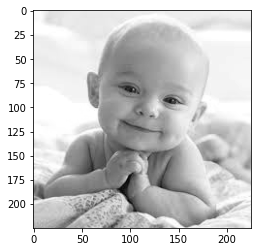

In [5]:
#if you have matplotlib installed then 
plt.imshow(gray_img, cmap='gray')

# or display the gray image using OpenCV
# cv2.imshow('Test Imag', gray_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

It looks beautiful, does'nt it? Now let's detect face but before we can do face detection we have to load our Haar cascade classifier. OpenCV provides us with a class **[`cv2.CascadeClassifier`](http://docs.opencv.org/2.4.13.2/modules/objdetect/doc/cascade_classification.html#cascadeclassifier)** which takes input the training file of the classifier (Haar/LBP) we want to load and loads it for us. It's that easy! 

As we want to load our favorite Haar classifier so XML training files for Haar cascade are stored in `opencv/data/haarcascades/` folder. You can also find them in data folder of Github repo I have shared with you at the end of this article. 

Let's load up our classifier. 

In [6]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Face-Detection-OpenCV-master/data/haarcascade_frontalface_alt.xml')

Now how do we detect face from image using our `CascadeClassifier` we just loaded? Well OpenCV's CascadedClassifier has made it simple for us as it comes with a simple function **`detectMultiScale`**. This function detects the faces in a given test image and following are details of its options/arugments.

* **`detectMultiScale(image, scaleFactor, minNeighbors)`:** A general function that detects objects. Since we are calling it on the face cascade, that’s what it detects. If faces are found, this function returns a list of positions of detected faces as Rect(x,y,w,h). If no faces are detected then it returns `None`.

* **`image`:** The first option is the **gray scale image**. Again, the image should be **_gray scale_**.

* **`scaleFactor`:** Since some faces may be closer to the camera, they would appear bigger than those faces in the back. The scale factor compensates for this.

* **`minNeighbors`:** The detection algorithm uses a moving window to detect objects. This parameter defines how many objects are detected near the current one before it declares the face found.  

There are other parameters as well and you can review the full details of this function [here](http://docs.opencv.org/2.4.13.2/modules/objdetect/doc/cascade_classification.html#cv2.CascadeClassifier.detectMultiScale). These parameters need to be tuned according to your data. 

Now that we know a simple and easy way to detect faces, we can find the face in our test image. Then let's detect one. The following code will try to detect face from image and if detected it will print the number of faces found in the image, which in our case should be 1. 

In [7]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);

#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  1


Ohooo! We detected our face.

Next, let's loop over the list of faces (rectangles) it returned and draw those rectangles using built in OpenCV **`rectangle`** function on our original colored image to see if it detected the right faces. 

In [8]:
#go over list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

Display the original image to see rectangles drawn and verify that detected faces are really faces and not false positives. 

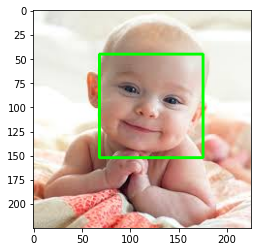

In [9]:
#conver image to RGB and show image
plt.imshow(convertToRGB(test1))

We did it! But our code is scattered and to try it on other test images we have to used the same code again and again so why not group our code into a function so that it is reusable? 

### Grouping Code into a Function

It would be easy and reusable if we grouped our face detection code into a function so let's make a function out of our code.

In [10]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy

Our **`detect_faces`** function takes 3 input parameters, first is our loaded `CascadeClassifier`, second is image we want to detect faces on and third is `scaleFactor` (Remember it from details of `detectMultiScale` function?). 

Inside function, first I make a copy `img_copy` of the passed image so that we do all operations on a copy and not the original image. Then I **convert the copied image `img_copy` to gray scale** as our face detector expects a gray scale image. After that I call the **`detectMultiScale`** function of our `CascadeClassifier` to return list of detected faces ( which is list of rectangles Rect(x, y, w, h)). 

Once we have the list of detected faces, I loop over them and **draw a rectangle on the copy of image `img_copy`**. At the end I return the modified copy of image. So that code is basically same as before, it is just grouped inside a function for reusability.

Now let's try this function on another test image. 

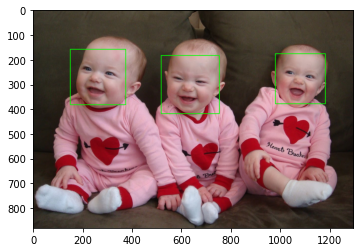

In [11]:
#load another image
test2 = cv2.imread('/content/drive/My Drive/Face-Detection-OpenCV-master/data/test3.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

### Dealing with false positives 

Let's try our face detector on another test image. 

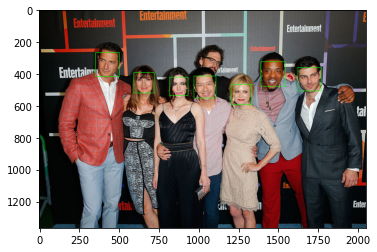

In [12]:
#load another image
test2 = cv2.imread('/content/drive/My Drive/Face-Detection-OpenCV-master/data/test4.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

Well, we got two false positives. What went wrong there? Remember, some faces may be closer to the camera and they would appear bigger than those faces in the back. The scale factor compensates for this so can tweak that parameter. For example, `scaleFactor=1.2` improved the results.

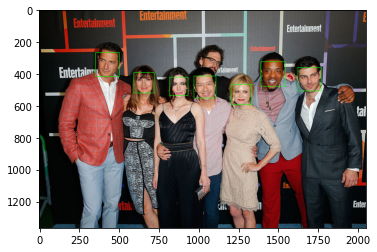

In [18]:
#load another image
test2 = cv2.imread('/content/drive/My Drive/Face-Detection-OpenCV-master/data/test4.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2, scaleFactor=1.1)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

So you have to tune these parameters according to information you have about your data.

### Code - LBP Cascade Classifier

XML training files for LBP cascade are stored in `opencv/data/lbpcascades/` folder and their names starts with (as you might have guessed, `lbpcascade`). 

From coding perspective you don't have to change anything in our face detection code except, instead of loading the `Haar` classifier training file you have to load the `LBP` training file and rest of the code is exactly same. That's sounds really easy, right? Well OpenCV has made it easy for! You can try as many detectors (eye detector, smile detector etc.) as you want, without changing much of the code.

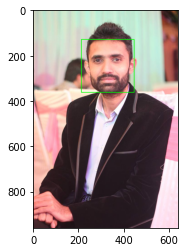

In [20]:
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Face-Detection-OpenCV-master/data/lbpcascade_frontalface.xml')

#load test image
test2 = cv2.imread('/content/drive/My Drive/Face-Detection-OpenCV-master/data/test2.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

So the code is exactly same, I load up our `CascadeClassifier` this time with **`LBP training file`**. I read a test image and call our **detect_faces** function which returns an image with faces drawn on it. Then I display the image.

Let's try it on another test image. 

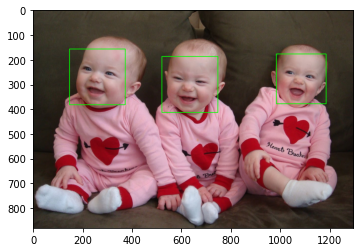

In [21]:
#load test image
test2 = cv2.imread('/content/drive/My Drive/Face-Detection-OpenCV-master/data/test3.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

## 3. Haar and LBP Results Analysis

I have shown a table comparing the two classifiers but you may not believe so why not I show you the results on real images? Let's do it then! We will run both `Haar` and `LBP` on **two test images to see accuracy and time delay of each**.

In [22]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Face-Detection-OpenCV-master/data/haarcascade_frontalface_alt.xml')
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Face-Detection-OpenCV-master/data/lbpcascade_frontalface.xml')

#load test image1
test1 = cv2.imread('/content/drive/My Drive/Face-Detection-OpenCV-master/data/test5.jpg')
#load test image2
test2 = cv2.imread('/content/drive/My Drive/Face-Detection-OpenCV-master/data/test6.jpg')

I have loaded both **Haar** and **LBP** classifiers and two test images **test1** and **test2**.

### Test-1

Let's first try both classifiers on test1 image.

In [24]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

I have used Python library function **time.time()** to note time. So before detecting faces on our test image, I note the start time **t1** and then I call our function **detect_faces** and then again I note end time **t2**. The difference between start time t1 and end time t2, **_dt1_** is what we are interested in **as it is time taken by our face detector to detect faces**.

Let's do the same for **LBP** classifier.

In [25]:
#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

Now that we have the face detected images and times taken by our both face detectors, let's display the results and see which one performs better.

I am going to use `matplotlib` function **[subplots(rows, cols, figsize)](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)** to display our results side by side. I am displaying the time difference as a title of each subplot (image window). 

Let's see the results then! 

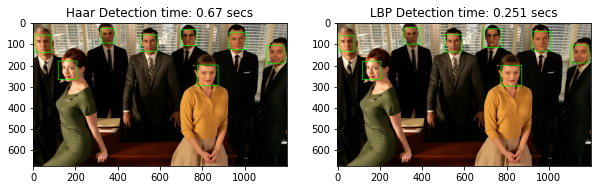

In [26]:
#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)

- **Accuracy:** Both `Haar` and `LBP` detected faces successfully.
- **Speed:** `LBP` was faster than `Haar`.

### Test-2 

Let's see the results for test2 image. The code is exactly same as for test1.

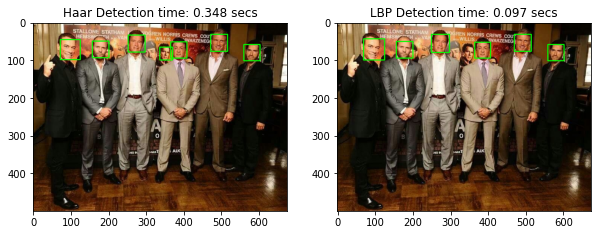

In [27]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)

- **Accuracy:** `Haar` detected more faces and than `LBP`. 
- **Speed:** `LBP` was significantly faster than `Haar`.

## End Notes

As you can see **`LBP` is significantly faster than `Haar`** and not that much behind in accuracy so depending on the needs of your application you can use any of the above-mentioned face detection algorithms. Try the code and have fun detecting different faces and analyzing the result. And don't forget to thank OpenCV for giving the implementation of the above-mentioned algorithms.


You can download the complete code from this [repo](https://github.com/informramiz/Face-Detection-OpenCV) along with test images and LBP and Haar training files. 